## Clustering Summary

### 병합 군집 간단하게 알아보기
<pre>
(1) 각 포인트를 하나의 클러스터로 지정한다.
(2) 어떤 종료 조건(클러스터 개수)을 만족할 때가지 비슷한 두 클러스터를 합쳐나간다.
(3) 하나의 포인트에서 시작하여 마지막 클러스터까지 이동
</pre>

### 병합군집
<pre>
(1) 병합 군집은 계층적 군집(hierarchical clustering)을 만든다.
(1) 병합 군집은 predict 메서드가 없다.
(2) 훈련 세트 모델을 만들고 클러스터 소속 정보를 얻기 위해 fit_predict 메서드 사용한다.
(3) sklearn.cluster.AgglomerativeClustering 클래스 사용
</pre>

### scikit-learn 옵션
<pre>
(3) linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다.

ward  : 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. (대부분 이를 사용)
average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.
complete : 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.
</pre>

In [14]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.neighbors import KernelDensity
%matplotlib inline

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)


# 아래 함수는 mglearn에서 가져온 것이다.
def plot_agglomerative_algorithm():
    # generate synthetic two-dimensional data
    X, y = make_blobs(random_state=0, n_samples=12)

    agg = AgglomerativeClustering(n_clusters=X.shape[0], compute_full_tree=True).fit(X)

    fig, axes = plt.subplots(X.shape[0] // 5, 5, subplot_kw={'xticks': (),
                                                             'yticks': ()},
                             figsize=(15, 8))

    eps = X.std() / 2

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    for i, ax in enumerate(axes.ravel()):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)
        ax.set_title("단계 %d" % i)
        ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=2)

    axes[0, 0].set_title("초기화")



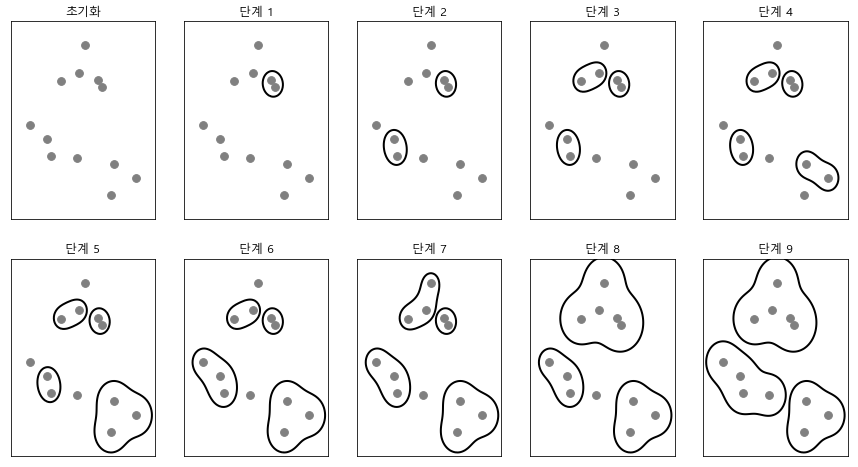

In [15]:
plot_agglomerative_algorithm()

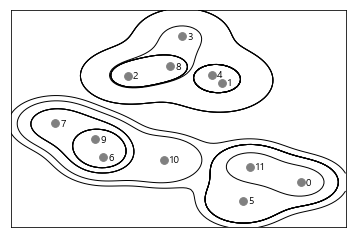

In [16]:
mglearn.plots.plot_agglomerative()